# Neural Network

## Neural Network For Continuous Input


* Load CSV Iris dataset
* Construct Neural Network Classifier
* Fit the model with the trainning data
* Evaluate the accuracy of the model

## Load the iris CSV data to TensorFlow

Iris data set contains 150 rows of data, comprising 50 samples from each of three related Iris species: Iris setosa, Iris virginica, and Iris versicolor.

In [141]:
from six.moves import urllib
import os

def download_file_from_url(source_url, dest_path):
    # Create directory if not already existed
    path_folder = '/'.join(dest_path.split('/')[:-1])
    if not os.path.exists(path_folder):
        os.mkdir(path_folder)
        print ("Making path_folder: %s" % path_folder)
    urllib.request.urlretrieve(source_url, dest_path)


In [143]:
iris_data_path = "/tmp/workspace/continuous-dnn/iris.data"
iris_data_source_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

download_file_from_url(iris_data_source_url, iris_data_path)

Making path_folder: /tmp/workspace/continuous-dnn


In [195]:
import tensorflow as tf
IRIS_COLUMNS = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

IRIS_CONTINUOUS_COLUMNS = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

IRIS_LABEL_COLUMN = 'species'

### Data exploration

In [196]:
import pandas as pd

def read_csv_with_column(csv_file_path, column_names):
    return pd.read_csv(csv_file_path, names=column_names, skipinitialspace=True)

In [328]:
df_iris_data = read_csv_with_column(train_data_path, IRIS_COLUMNS)

## Convert labels to different int values

Since classifier can only work with int32/int64, we need to convert the training and testing lable data

In [327]:
# Convert categorical data to real values with pandas.Categorical
def convert_categorical_nomial(df, column_name):
    return pd.to_numeric(pd.Categorical.from_array(df[column_name]).codes)

In [329]:
# Convert the caregorical column to int values
df_iris_data[IRIS_LABEL_COLUMN] = convert_categorical_nomial(df_iris_data, IRIS_LABEL_COLUMN)

In [334]:
# the above computation equals the following
# df_iris_data[IRIS_LABEL_COLUMN] = df_data["species"].apply(lambda x : 0 if 'Iris-setosa' in x else (1 if 'Iris-virginica' in x else 2))


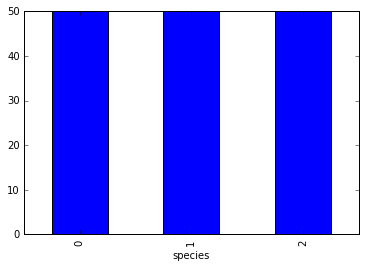

In [335]:
# enable pylab mode in ipython notebook as pylab has been deprecated
%matplotlib inline
def group_n_plot_by_label(df, label_column):
    df.groupby(label_column).size().plot(kind="bar")
    
group_n_plot_by_label(df_iris_data, IRIS_LABEL_COLUMN)

In [336]:
# Divid data into testing data and 
def split_data(df, sample_rate, random_state=15):
    df_train = df.sample(frac=0.8, random_state=random_state)
    df_test = df.drop(df_train.index)
    return df_train, df_test

# Verify that the train data and test data are evenly sampled
def plot_train_test_data(df_train, df_test, label_column):
    group_n_plot_by_label(df_train, label_column)
    group_n_plot_by_label(df_test, label_column)

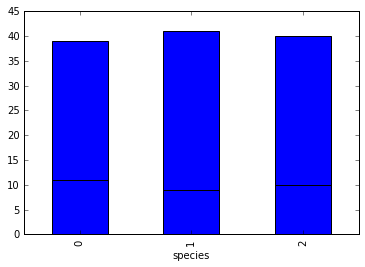

In [337]:
df_iris_train, df_iris_test = split_data(df_iris_data, 0.8)

plot_train_test_data(df_iris_train, df_iris_test, IRIS_LABEL_COLUMN)

## Convert data to tensor
Since all input are continuous input, use tf.constant is a good choice

In [338]:
def input_fn(df, continuous_columns, label_column):
    feature_cols = {k : tf.constant(df[k].values) for k in continuous_columns}                        
    label = tf.constant(df[label_column].values)
    return feature_cols, label

In [339]:
def iris_train_input_fn():
    return input_fn(df_iris_train, IRIS_CONTINUOUS_COLUMNS, IRIS_LABEL_COLUMN)

def iris_test_input_fn():
    return input_fn(df_iris_test, IRIS_CONTINUOUS_COLUMNS, IRIS_LABEL_COLUMN)

## Create feature columns
We replaced the 'class' column with 'label' column, so all of them a real valued features: 
* real_valued_column

In [322]:
# "sepal_length", "sepal_width", "petal_length", "petal_width"
def create_feature_columns(feature_columns_names):
    feature_columns = []
    for feature_name in feature_columns_names:
        feature = tf.contrib.layers.real_valued_column(feature_name)
        feature_columns.append(feature)
    return feature_columns

In [323]:
iris_feature_column = create_feature_columns(IRIS_CONTINUOUS_COLUMNS)

## Create DNN Model
* DNNClassifier
* feature_columns = feature_columns
* hidden_units = [10, 20, 10], three hidden layers, containing 10, 20, and 10 neurons.
* n_classes=3, Three target classes, representing the three iris species
* model_model Tensorflow use it to save check point data during model trainning.

In [340]:
model_dir = "/tmp/workspace/continuous-dnn/"
iris_classifier = tf.contrib.learn.DNNClassifier(feature_columns=iris_feature_column,
                                            hidden_units=[10, 20, 10],
                                            n_classes=3,
                                            model_dir=model_dir)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x125b91050>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}


## Fit the DNNClassifier to the iris training data

In [341]:
iris_classifier.fit(input_fn=iris_train_input_fn, steps = 2000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 6001 into /tmp/workspace/continuous-dnn/model.ckpt.
INFO:tensorflow:loss = 7.81006, step = 6001
INFO:tensorflow:global_step/sec: 800.614
INFO:tensorflow:loss = 0.0777194, step = 6101
INFO:tensorflow:global_step/sec: 727.728
INFO:tensorflow:loss = 0.0605825, step = 6201
INFO:tensorflow:global_step/sec: 690.327
INFO:tensorflow:loss = 0.0542215, step = 6301
INFO:tensorflow:global_step/sec: 696.563
INFO:tensorflow:loss = 0.0505909, step = 6401
INFO:tensorflow:global_step/sec: 832.896
INFO:tensorflow:loss = 0.0481317, step = 6501
INFO:tensorflow:global_step/sec: 737.883
INFO:tensorflow:

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x125b91110>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='sepal_length', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='sepal_width', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='petal_length', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='petal_width', dimension=1, default_value=None, dtype=tf.float32, normalizer=None)), 'embedding_lr_multipliers': None, 'optimizer': None, 'dropout': None, 'gradient_clip_norm': None, 'activation_fn': <function relu at 0x10b9199b0>, 'input_layer_min_slice_size': None})

### Evaluate the model accuracy

Evaluate the accuracy of the function with test input


In [174]:
iris_results = classifier.evaluate(input_fn=test_input_fn, steps=1)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-03-28-07:05:44
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-03-28-07:05:44
INFO:tensorflow:Saving dict for global step 4200: accuracy = 0.966667, auc = 0.998333, global_step = 4200, loss = 0.113523


In [251]:
iris_results

{'accuracy': 0.96666664,
 'auc': 0.99833333,
 'global_step': 4200,
 'loss': 0.1135229}

# Neural Netowrk With Categorical Input

* Load Car Evaluation Data set: http://archive.ics.uci.edu/ml/datasets/Car+Evaluation
* Load CSV Data
* Constructy Neural Network Classifier
* Fit the model with the trainning data
* Evaluate the accuracy of the model

In [304]:
car_data_path = "/tmp/workspace/categorical-dnn/car.data"
car_data_source_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

download_file_from_url(car_data_source_url, car_data_path)

### Load car CSV data

In [313]:
CAR_COLUMNS = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'classes']

CAR_CATEGORICAL_COLUMN = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

CAR_LABEL_COLUMN = 'classes'

df_car_data = read_csv_with_column(car_data_path, CAR_COLUMNS)

### Covnert categorical data to int values

In [342]:
def convert_categorical_columns_nomial(df, categorical_columns):
    for column_name in categorical_columns:
        df[column_name] = convert_categorical_nomial(df, column_name)

In [343]:
convert_categorical_columns_nomial(df_car_data, CAR_COLUMNS)

### Split car data into trainning and testing

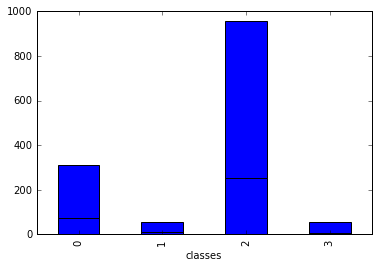

In [345]:
df_car_train, df_car_test = split_data(df_car_data, 0.8, random_state=20)

plot_train_test_data(df_car_train, df_car_test, CAR_LABEL_COLUMN)

### def input functions

Convert data to tensor

In [346]:
def car_train_input_fn():
    return input_fn(df_car_train, CAR_CATEGORICAL_COLUMN, CAR_LABEL_COLUMN)

def car_test_input_fn():
    return input_fn(df_car_test, CAR_CATEGORICAL_COLUMN, CAR_LABEL_COLUMN)

### Create Feature Columns

In [347]:
car_feature_columns = create_feature_columns(CAR_CATEGORICAL_COLUMN)

In [348]:
model_dir = "/tmp/workspace/categorical-dnn/"
car_classifier = tf.contrib.learn.DNNClassifier(feature_columns=car_feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=4,
                                            model_dir=model_dir)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x123528a10>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}


In [349]:
car_classifier.fit(input_fn=car_train_input_fn, steps = 2000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/workspace/categorical-dnn/model.ckpt.
INFO:tensorflow:loss = 1.55783, step = 1
INFO:tensorflow:global_step/sec: 386.275
INFO:tensorflow:loss = 0.684059, step = 101
INFO:tensorflow:global_step/sec: 412.086
INFO:tensorflow:loss = 0.62062, step = 201
INFO:tensorflow:global_step/sec: 447.627
INFO:tensorflow:loss = 0.579463, step = 301
INFO:tensorflow:global_step/sec: 458.88
INFO:tensorflow:loss = 0.511961, step = 401
INFO:tensorflow:global_step/sec: 435.893
INFO:tensorflow:loss = 0.426289, step = 501
INFO:tensorflow:global_step/sec: 421.75
INFO:tensorflow:loss = 0.369106, s

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x1235288d0>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='buying', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='maint', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='doors', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='persons', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='lug_boot', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='safety', dimension=1, default_value=None, dtype=tf.float32, normalizer=None)), 'embedding_lr_multipliers': None, 'optimizer': None, 'dropout': None, 'gradient_clip_norm': None, 'activation_fn': <function relu at 0x10b9199b0>, 'input_layer_min_slice

### Evaluate the results

In [351]:
car_results = car_classifier.evaluate(input_fn=car_test_input_fn, steps=1)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-03-28-07:59:42
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-03-28-07:59:43
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.933526, auc = 0.991921, global_step = 2000, loss = 0.178961


In [353]:
car_results

{'accuracy': 0.93352604,
 'auc': 0.99192089,
 'global_step': 2000,
 'loss': 0.17896064}